<a href="https://colab.research.google.com/github/vsinyutsina/advanced_python/blob/main/HW1/first_data_load.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа

# Задача

Один из способов повысить эффективность взаимодействия банка с клиентами — отправлять предложение о новой услуге не всем клиентам, а только некоторым, которые выбираются по принципу наибольшей склонности к отклику на это предложение.

Задача заключается в том, чтобы предложить алгоритм, который будет выдавать склонность клиента к положительному или отрицательному отклику на предложение банка. Предполагается, что, получив такие оценки для некоторого множества клиентов, банк обратится с предложением только к тем, от кого ожидается положительный отклик.


Для решения этой задачи загрузите файлы из базы в Postgres (или используйте `*.csv` как есть).
Эта БД хранит информацию о клиентах банка и их персональные данные, такие как пол, количество детей и другие.

Описание таблиц с данными представлено ниже.


**D_work**

Описание статусов относительно работы:
- ID — идентификатор социального статуса клиента относительно работы;
- COMMENT — расшифровка статуса.


**D_pens**

Описание статусов относительно пенсии:
- ID — идентификатор социального статуса;
- COMMENT — расшифровка статуса.


**D_clients**

Описание данных клиентов:
- ID — идентификатор записи;
- AGE	— возраст клиента;
- GENDER — пол клиента (1 — мужчина, 0 — женщина);
- EDUCATION — образование;
- MARITAL_STATUS — семейное положение;
- CHILD_TOTAL	— количество детей клиента;
- DEPENDANTS — количество иждивенцев клиента;
- SOCSTATUS_WORK_FL	— социальный статус клиента относительно работы (1 — работает, 0 — не работает);
- SOCSTATUS_PENS_FL	— социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
- REG_ADDRESS_PROVINCE — область регистрации клиента;
- FACT_ADDRESS_PROVINCE — область фактического пребывания клиента;
- POSTAL_ADDRESS_PROVINCE — почтовый адрес области;
- FL_PRESENCE_FL — наличие в собственности квартиры (1 — есть, 0 — нет);
- OWN_AUTO — количество автомобилей в собственности.


**D_agreement**

Таблица с зафиксированными откликами клиентов на предложения банка:
- AGREEMENT_RK — уникальный идентификатор объекта в выборке;
- ID_CLIENT — идентификатор клиента;
- TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было).
    
    
**D_job**

Описание информации о работе клиентов:
- GEN_INDUSTRY — отрасль работы клиента;
- GEN_TITLE — должность;
- JOB_DIR — направление деятельности внутри компании;
- WORK_TIME — время работы на текущем месте (в месяцах);
- ID_CLIENT — идентификатор клиента.


**D_salary**

Описание информации о заработной плате клиентов:
- ID_CLIENT — идентификатор клиента;
- FAMILY_INCOME — семейный доход (несколько категорий);
- PERSONAL_INCOME — личный доход клиента (в рублях).


**D_last_credit**

Информация о последнем займе клиента:
- ID_CLIENT — идентификатор клиента;
- CREDIT — сумма последнего кредита клиента (в рублях);
- TERM — срок кредита;
- FST_PAYMENT — первоначальный взнос (в рублях).


**D_loan**

Информация о кредитной истории клиента:
- ID_CLIENT — идентификатор клиента;
- ID_LOAN — идентификатор кредита.

**D_close_loan**

Информация о статусах кредита (ссуд):
- ID_LOAN — идентификатор кредита;
- CLOSED_FL — текущий статус кредита (1 — закрыт, 0 — не закрыт).

Ниже представлен минимальный список колонок, которые должны находиться в итоговом датасете после склейки и агрегации данных. По своему усмотрению вы можете добавить дополнительные к этим колонки.

    - AGREEMENT_RK — уникальный идентификатор объекта в выборке;
    - TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было);
    - AGE — возраст клиента;
    - SOCSTATUS_WORK_FL — социальный статус клиента относительно работы (1 — работает, 0 — не работает);
    - SOCSTATUS_PENS_FL — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
    - GENDER — пол клиента (1 — мужчина, 0 — женщина);
    - CHILD_TOTAL — количество детей клиента;
    - DEPENDANTS — количество иждивенцев клиента;
    - PERSONAL_INCOME — личный доход клиента (в рублях);
    - LOAN_NUM_TOTAL — количество ссуд клиента;
    - LOAN_NUM_CLOSED — количество погашенных ссуд клиента.


Будьте внимательны при сборке датасета: это реальные банковские данные, в которых могут наблюдаться дубли, некорректно заполненные значения или значения, противоречащие друг другу. Для получения качественной модели необходимо предварительно очистить датасет от такой информации.

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# ! apt-get install git

In [4]:
# !git clone https://github.com/aiedu-courses/stepik_linear_models.git drive/MyDrive/mlhl_python_2024/

## Задание 1

Соберите всю информацию о клиентах в одну таблицу, где одна строчка соответствует полной информации об одном клиенте.

In [2]:
import pandas as pd
import os

path_to_files = 'drive/MyDrive/mlhl_python_2024/datasets/clients/'

datasets = dict()
for f in os.listdir(path_to_files):
  df_tmp = pd.read_csv(path_to_files + f)

  datasets[f] = df_tmp

In [3]:
os.listdir(path_to_files)

['D_clients.csv',
 'D_close_loan.csv',
 'D_job.csv',
 'D_last_credit.csv',
 'D_loan.csv',
 'D_pens.csv',
 'D_salary.csv',
 'D_target.csv',
 'D_work.csv']

In [4]:
cols = ['AGREEMENT_RK', 'TARGET', 'AGE', 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'GENDER', 'CHILD_TOTAL', 'DEPENDANTS',
        'PERSONAL_INCOME', 'LOAN_NUM_TOTAL', 'LOAN_NUM_CLOSED']

In [5]:
# Проверяем наличие дублей в таблицах

assert (datasets['D_clients.csv'].groupby('ID')['ID'].count() > 1).sum() == 0 # нет дублей
assert (datasets['D_job.csv'].groupby('ID_CLIENT')['ID_CLIENT'].count() > 1).sum() == 0 # нет дублей
# Есть дубли в таблице D_salary
# assert (datasets['D_salary.csv'].groupby('ID_CLIENT')['ID_CLIENT'].count() > 1).sum() == 0
salary = datasets['D_salary.csv'].drop_duplicates()
#
assert (datasets['D_last_credit.csv'].groupby('ID_CLIENT')['ID_CLIENT'].count() > 1).sum() == 0 # нет дублей

In [6]:
join_params = {'left_on': 'ID',
               'right_on': 'ID_CLIENT',
               'how': 'left'}

df_loan = datasets['D_loan.csv'].merge(datasets['D_close_loan.csv'], on='ID_LOAN', how='left')

df_loan_agg = df_loan.groupby('ID_CLIENT').agg(LOAN_NUM_TOTAL=('CLOSED_FL', 'count'),
                                            LOAN_NUM_CLOSED=('CLOSED_FL', 'sum'))\
                                       .reset_index()

df_template = datasets['D_clients.csv'].merge(df_loan_agg, **join_params)
df_template = df_template.merge(datasets['D_job.csv'], **join_params)
df_template = df_template.merge(salary, **join_params)
df_template = df_template.merge(datasets['D_last_credit.csv'], **join_params)

join_params['how'] = 'inner'
df_template = df_template.merge(datasets['D_target.csv'], **join_params)

df_min_data = df_template[cols]

<ipython-input-6-a8bd755b2b3e>:14: FutureWarning: Passing 'suffixes' which cause duplicate columns {'ID_CLIENT_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_template = df_template.merge(datasets['D_last_credit.csv'], **join_params)


In [7]:
# дублей нет, все супер
(df_min_data.groupby('AGREEMENT_RK')['TARGET'].count() > 1).sum()

0

In [8]:
df_min_data.to_csv('drive/MyDrive/mlhl_python_2024/HW1/min_sample_data.csv', index=False)

In [9]:
df_min_data.isna().any()

AGREEMENT_RK         False
TARGET               False
AGE                  False
SOCSTATUS_WORK_FL    False
SOCSTATUS_PENS_FL    False
GENDER               False
CHILD_TOTAL          False
DEPENDANTS           False
PERSONAL_INCOME      False
LOAN_NUM_TOTAL       False
LOAN_NUM_CLOSED      False
dtype: bool

## Задание 2

При помощи инструмента Streamlit проведите разведочный анализ данных. В него может входить:

* построение графиков распределений признаков
* построение матрицы корреляций
* построение графиков зависимостей целевой переменной и признаков
* вычисление числовых характеристик распределения числовых столбцов (среднее, min, max, медиана и так далее)
* любые другие ваши идеи приветствуются!

[Пример Streamlit-приложения](https://rateyourflight.streamlit.app) с разведочным анализом, прогнозом модели и оценкой ее результатов.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

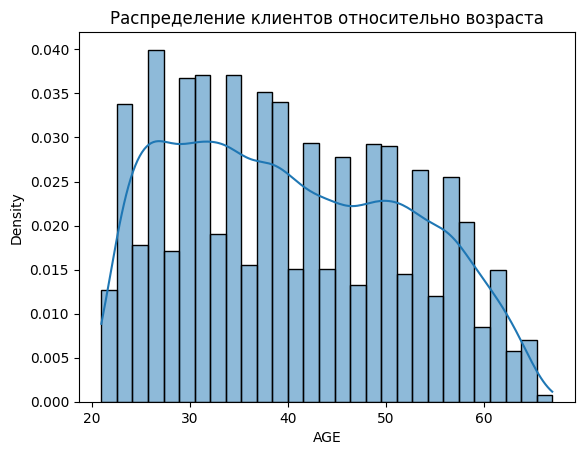

In [11]:
sns.histplot(data=df_min_data,
             x='AGE',
             kde=True,
             stat="density",
             common_norm=False)
plt.title('Распределение клиентов относительно возраста')
plt.show()

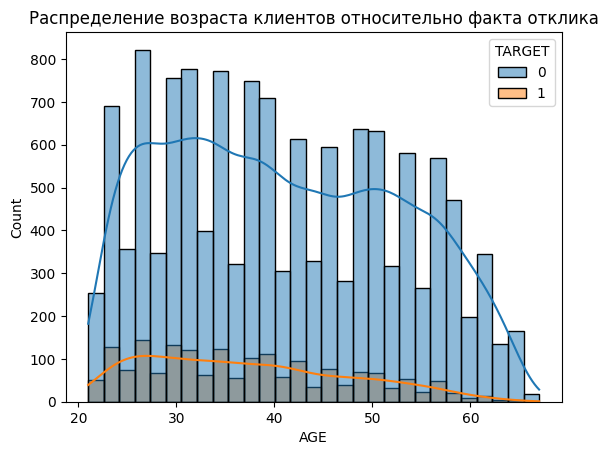

In [12]:
sns.histplot(data=df_min_data,
             x='AGE',
             kde=True,
            #  stat="density",
            #  common_norm=False,
             hue='TARGET')
plt.title('Распределение возраста клиентов относительно факта отклика')
plt.show()

[]

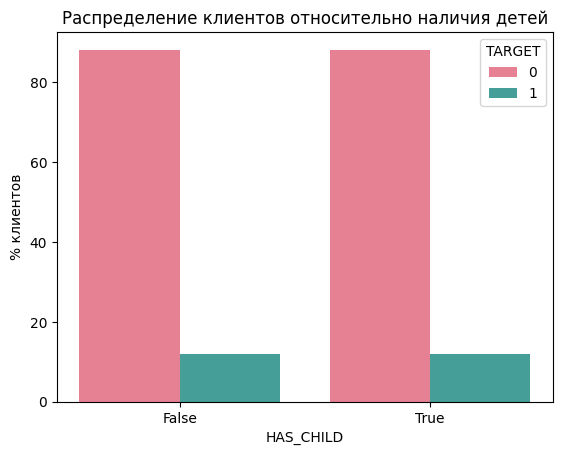

In [13]:
df_child = df_min_data.copy()
df_child['HAS_CHILD'] = df_child.CHILD_TOTAL > 0
df_child_agg = df_child.groupby(['HAS_CHILD', 'TARGET'])['AGREEMENT_RK'].count()
df_child_agg =  (df_child_agg / df_child.groupby(['HAS_CHILD']).AGREEMENT_RK.count() * 100).reset_index()

sns.barplot(data=df_child_agg,
            hue='TARGET',
            y='AGREEMENT_RK',
            x='HAS_CHILD',
            palette=sns.color_palette("husl", 2))
plt.title('Распределение клиентов относительно наличия детей')
plt.ylabel('% клиентов')
plt.plot()

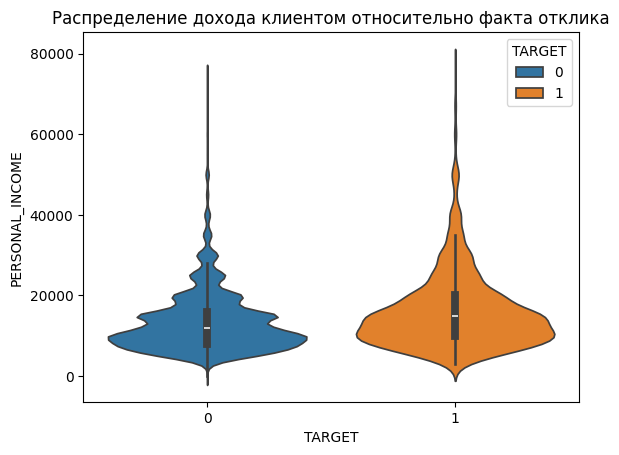

In [14]:
q999 = df_min_data.PERSONAL_INCOME.quantile(.999)

sns.violinplot(data=df_min_data[df_min_data.PERSONAL_INCOME < q999],
            x='TARGET',
            y='PERSONAL_INCOME',
            hue='TARGET')
plt.title('Распределение дохода клиентом относительно факта отклика')
plt.show()

<Axes: >

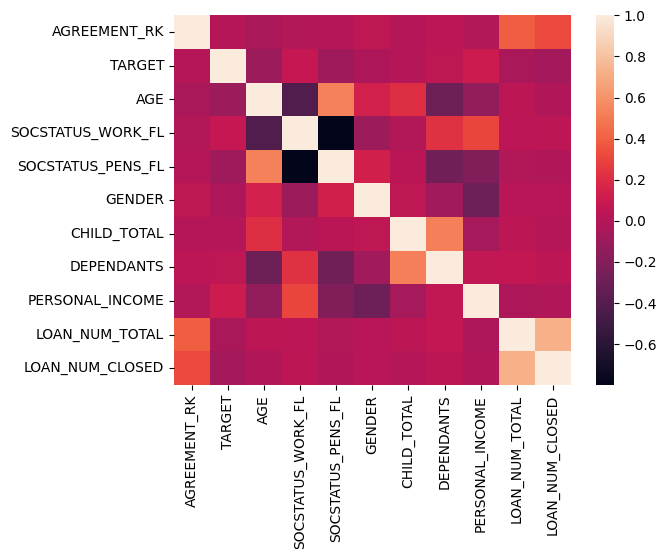

In [15]:
sns.heatmap(data=df_min_data.corr(method='spearman'))

[]

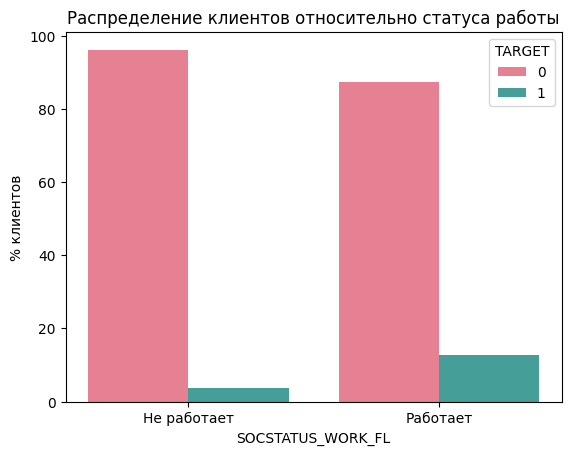

In [16]:
social_status = df_min_data.groupby(['SOCSTATUS_WORK_FL', 'TARGET'])['AGREEMENT_RK'].count()
social_status = (social_status / df_min_data.groupby(['SOCSTATUS_WORK_FL']).AGREEMENT_RK.count() * 100).reset_index()
social_status['SOCSTATUS_WORK_FL'] = social_status['SOCSTATUS_WORK_FL'].apply(lambda x: 'Работает' if x else 'Не работает')

sns.barplot(data=social_status,
            hue='TARGET',
            y='AGREEMENT_RK',
            x='SOCSTATUS_WORK_FL',
            palette=sns.color_palette("husl", 2))
plt.title('Распределение клиентов относительно статуса работы')
plt.ylabel('% клиентов')
plt.plot()

[]

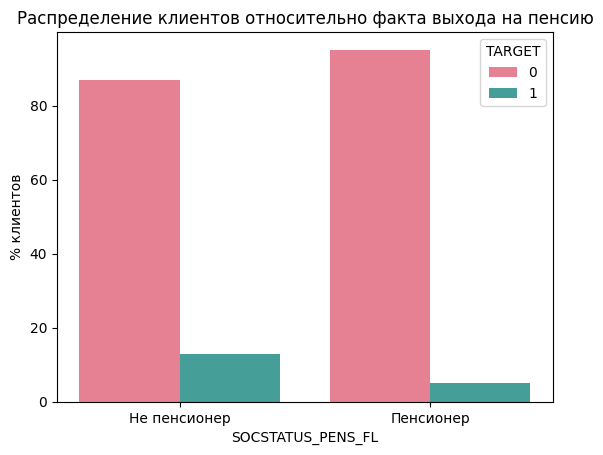

In [26]:
social_status = df_min_data.groupby(['SOCSTATUS_PENS_FL', 'TARGET'])['AGREEMENT_RK'].count()
social_status = (social_status / df_min_data.groupby(['SOCSTATUS_PENS_FL']).AGREEMENT_RK.count() * 100).reset_index()
social_status['SOCSTATUS_PENS_FL'] = social_status['SOCSTATUS_PENS_FL'].apply(lambda x: 'Пенсионер' if x else 'Не пенсионер')

plot = sns.barplot(data=social_status,
            hue='TARGET',
            y='AGREEMENT_RK',
            x='SOCSTATUS_PENS_FL',
            palette=sns.color_palette("husl", 2))
plt.title('Распределение клиентов относительно факта выхода на пенсию')
plt.ylabel('% клиентов')
plt.plot()

## Обучение модели

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler
import pickle
from datetime import datetime

In [19]:
df_sample = df_min_data.set_index('AGREEMENT_RK')
target = df_sample['TARGET']
df_sample.drop('TARGET', inplace=True, axis=1)

In [20]:
scaler = MinMaxScaler()
sample_array = scaler.fit_transform(df_sample)

model_name =f'scaler_{datetime.today()}.pkl'

with open(model_name, 'wb') as f:
  pickle.dump(scaler, f, protocol=pickle.HIGHEST_PROTOCOL)

In [21]:
import warnings
warnings.filterwarnings('ignore')

params = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}
model = LogisticRegression()

cv = KFold(shuffle=True, random_state=12)

gs = GridSearchCV(model,
                  param_grid=params,
                  cv=cv,
                  scoring='neg_log_loss',
                  verbose=True)

gs.fit(sample_array, target)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=12, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='neg_log_loss', verbose=True)

In [22]:
cv_grid = pd.DataFrame(gs.cv_results_['params'])

cv_grid['mean_test_score'] = gs.cv_results_['mean_test_score']

In [23]:
cv_grid.head()

,penalty,solver,mean_test_score
0,l1,lbfgs,NaN
1,l1,liblinear,-0.352707
2,l1,newton-cg,NaN
3,l1,newton-cholesky,NaN
4,l1,sag,NaN


In [24]:
-gs.best_score_

0.35266703515860487

In [25]:
best_params = gs.best_params_

model = LogisticRegression(**best_params)
model.fit(sample_array, target)

model_name =f'log_reg_{datetime.today()}.pkl'

with open(model_name, 'wb') as f:
  pickle.dump(model, f, protocol=pickle.HIGHEST_PROTOCOL)

In [36]:
import numpy as np

coefficients = model.coef_[0]

feature_importance = pd.DataFrame({'Feature': cols[2:], 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=True)

In [37]:
feature_importance

,Feature,Importance
3,GENDER,0.017978
5,DEPENDANTS,0.147334
2,SOCSTATUS_PENS_FL,0.252345
1,SOCSTATUS_WORK_FL,0.479433
0,AGE,1.222234
4,CHILD_TOTAL,1.383500
7,LOAN_NUM_TOTAL,3.518595
8,LOAN_NUM_CLOSED,5.011937
6,PERSONAL_INCOME,5.767355


<Axes: ylabel='Feature'>

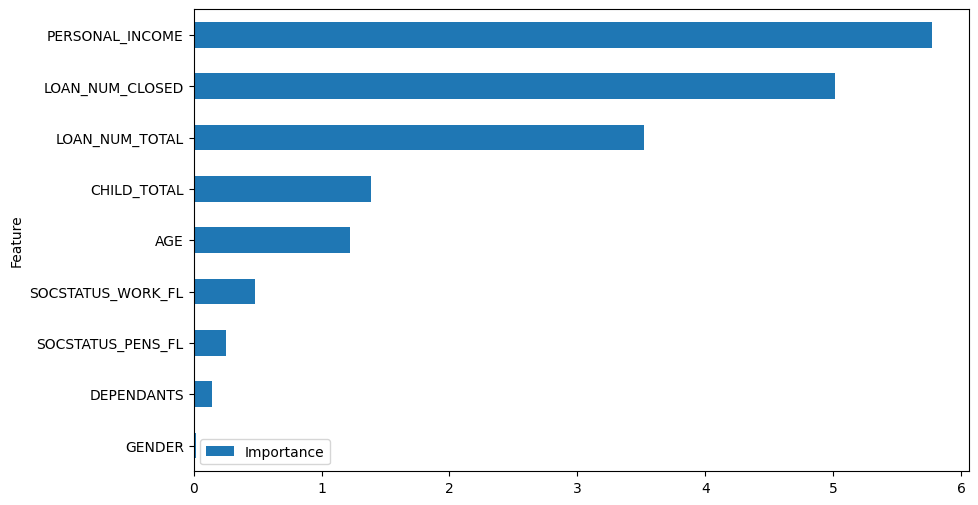

In [38]:
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))